# WeRateDogs Twitter Archive Data Wrangling Report

#### Introduction

The current project investigates the data wrangling capabilities of Python and its libraries by investigating the WeRateDogs Twitter account archive. This contains basic tweet data for the 2,356 tweets containing ratings (out of their 5,000+ twitter count) as of August 1, 2017.

The project objectives revolved around wrangling the WeRateDogs Twitter data to generate clean and easily accessible data from which analyses and visualizations are created to extract meaningful insights from the tweet metrics.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

## Gathering

**1. Accessing enhanced twitter archive (.csv) directly.**

WeRateDogs Twitter archive downloaded manually from .csv file.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

**2. Additional Twitter JSON data.**

Importing additional data via the twitter API. Query Twitter API via Python's tweepy library to obtain JSON data for WeRateDogs tweets to extract `tweet_id`, `retweet_count` and `favourite_count`.

In [3]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [4]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

1: 892420643555336193


Rate limit reached. Sleeping for: 49


Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513
Success
34: 8859848

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Rate limit reached. Sleeping for: 585


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 593


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [5]:
# Reading JSON data as DataFrame
json_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        # Obtain required id, retweet_count and favorite_count data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        # Create dictionary with JSON data and append to list
        data_dict = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        json_list.append(data_dict)

# Convert JSON data dictionary list to DataFrame
api_data = pd.DataFrame(json_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [6]:
print('Total number of TweepErrors: {}.'.format(len(fails_dict)))

Total number of TweepErrors: 25.


**3. Accesing Image Predictions File.**

Gathering image predicitions file hosted on Udacity's servers in [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). Accessed programmatically using Python's request library.

In [217]:
# Define url where data is hosted
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Get data from url
response = requests.get(url)
# Check for .tsv file in PATH and empty contents first
filename = "image_predictions.tsv"
if os.path.isfile(filename):
    raw = open(filename, "r+")
    raw.seek(0)
    raw.truncate()
# Write url data into .txt file in binary format
with open(filename, "wb+") as f:
    f.write(response.content)

In [218]:
# Read .tsv file into pandas DataFrame
data = []
with open(filename, encoding='utf-8') as f:
    headers = f.readline().split()
    for line in f:
        data.append(line.split())
    image_predictions = pd.DataFrame(data, columns=headers)

### Assessing

Key Point - Analysis requires that only original ratings with images are retained, thereby excluding retweets.

Quality - Content assessment (completeness, validity, accuracy and consistency).

Tidiness - Structure assessment according to set [rules](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

#### Twitter Archive Data

In [219]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [220]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [221]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


N.B. Several names identified as being invalid (e.g. "a", None...).

In [222]:
# Inspecting name data
twitter_archive.name.value_counts().head(35)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Toby         7
Bailey       7
an           7
Buddy        7
Oscar        6
Scout        6
Bella        6
Koda         6
Leo          6
Jax          6
Stanley      6
Jack         6
Rusty        6
Dave         6
Milo         6
Bentley      5
George       5
Sammy        5
Larry        5
Gus          5
Oakley       5
Name: name, dtype: int64

N.B. Actual names are all capitalized. Lower case names are errors.

In [223]:
# Identifying lower case "name"
name_errors = twitter_archive.name.str.contains('^[a-z]', regex = True)
print('There are {} incorrect names.'.format(len(twitter_archive[name_errors])))
twitter_archive[name_errors].name.value_counts().sort_index()

There are 109 incorrect names.


a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [224]:
# Checking for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [225]:
# Checking for duplicate values
print('Duplicate entries: {}'.format(sum(twitter_archive.duplicated())))

Duplicate entries: 0


In [226]:
# Checking for retweets and replies
print('Retweets: {}\nReplies: {}'.format
      (twitter_archive.retweeted_status_id.notnull().sum(), 
       twitter_archive.in_reply_to_status_id.notnull().sum()))

Retweets: 181
Replies: 78


In [227]:
# Checking denominators
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


N.B. Excessive maximum values (1776 and 170).
N.B.2. Incorrect minimum denominator equal to 0.

In [228]:
# Find tweets with denominator not equal to 10, 
# which are not retweets or replies
denominator_issues = ((twitter_archive.rating_denominator != 10) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna())
print('Denominator Issues: {}'.format(sum(denominator_issues)))

Denominator Issues: 17


In [229]:
# # Find tweets with numerator greater than 15, 
# which are not retweets or replies
numerator_issues = ((twitter_archive.rating_numerator >= 15) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna())
print('Numerator Issues: {}'.format(sum(numerator_issues)))

Numerator Issues: 18


#### API Retweet and Favourite Data

In [230]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [231]:
api_data.sample(5)

,tweet_id,retweet_count,favorite_count
1508,690005060500217858,1668,3626
334,831670449226514432,1812,10427
289,836397794269200385,27305,0
1644,682638830361513985,590,2056
5,891087950875897856,2820,18890


In [232]:
api_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2680.613900,7509.909481
std,6.823170e+16,4532.893406,11658.363944
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,543.000000,1308.000000
50%,7.182469e+17,1257.000000,3267.000000
75%,7.986692e+17,3115.000000,9194.000000
max,8.924206e+17,77073.000000,155101.000000


#### Image Predictions Data

In [233]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   object
 3   p1        2075 non-null   object
 4   p1_conf   2075 non-null   object
 5   p1_dog    2075 non-null   object
 6   p2        2075 non-null   object
 7   p2_conf   2075 non-null   object
 8   p2_dog    2075 non-null   object
 9   p3        2075 non-null   object
 10  p3_conf   2075 non-null   object
 11  p3_dog    2075 non-null   object
dtypes: object(12)
memory usage: 194.7+ KB


In [234]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Cross-DataFrames Assessment

In [235]:
all_columns = pd.Series(list(twitter_archive) + list(api_data) + list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

#### Quality

##### `twitter_archive` table
1. Data contains 181 retweets (**retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**).
2. Data contains 78 reply tweets (**in_reply_to_status_id**, **in_reply_to_user_id**).
3. The **timestamp** column is in string format.
4. 17 cases of denominator rating not equal to 10 for original tweets (excluding retweets and reply tweets). Note, some of these are simply a scaling issue. However, since they are a very small subset of data (<1%) these are ignored and dropped.
5. 18 cases of numerator exceeding 15. These seem to be incorrect values, and again are ignored and dropped for the time being.
6. Only 2297 tweets contain **expanded_urls**. Out of the 59 tweets with missing data, only 3 are original tweets.
7. 109 cases of data rows with invalid **name** cloumn values. Valid names all start with uppercase letters, and invalid ones with lowercase.


#### `api_data` table
1. With respect to the original twitter archive data, 25 tweets have been deleted (brought up as TweepErrors).

#### `image_predictions` table
1. Total data rows amounts to 2075 image predictions. Missing data with respect to `twitter_archive` is 281.
2. The **tweet_id** column is in string format rather than integer.

#### Tidiness

##### `twitter_archive` table
1. **Key Points**: Only interested in original tweets. Retweet data stored does not conform to tidy data standards (empty when retweets dropped).
2. **Key Points**: Only interested in original tweets. Reply tweet data stored does not conform to tidy data standards (empty when reply tweets dropped).
3. Numerical data columns located at the far right of the table, whereas long stings placed at the left. This makes readability of the tabulated data more difficult for further analysis.
4. 4 columns assigned for **doggo**, **floofer**, **pupper** and **puppo**. This does not conform to tidy data standards.
5. Unnecessary **rating_denominators** column once all have been standardized to 10.

#### `api_data` table
1. Data should be merged with `twitter_archive`, since **tweet_id** columns overlap, and two additional columns including numeric values for the tweets are presented in `api_data` which should be merged with the already ample data in `twitter_archive`.

#### `image_predictions` table
1. Data for most likely prediction of breed based on the highest confidence levels should be merged with `twitter_archive`, since **tweet_id** columns overlap and information could be contained within one DataFrame.

### Cleaning

In [236]:
twitter_archive_clean = twitter_archive.copy()
api_data_clean = api_data.copy()
image_predictions_clean = image_predictions.copy()

#### Quality `twitter_archive` #1
**Define**

Drop rows containing retweets. For this, drop rows where **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp** have non NaN values.

**Code**

In [237]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

**Test**

In [238]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Quality `twitter_archive` #2
**Define**

Drop rows containing reply tweets. For this, drop rows where **in_reply_to_status_id** and **in_reply_to_user_id** have non NaN values.

**Code**

In [239]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

**Test**

In [240]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Tidiness `twitter_archive` #1
**Define**

Drop columns containing retweet information. For this, drop **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp** columns.

**Code**

In [241]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'],
                                                    axis=1)

**Test**

In [242]:
# Checking columns to ensure retweet columns have been dropped
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Tidiness `twitter_archive` #2
**Define**

Drop columns containing reply tweet information. For this, drop **in_reply_to_status_id** and **in_reply_to_user_id** columns.

**Code**

In [243]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                           'in_reply_to_user_id'],
                          axis=1)

**Test**

In [244]:
# Checking columns to ensure retweet columns have been dropped
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Quality `twitter_archive` #3
**Define**

Modify **timestamp** column from string to datetime data type.

**Code**

In [245]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

**Test**

In [246]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

#### Quality `twitter_archive` #4

Numerous cases of denominator ratings
not equal to 10 for original tweets were identified. 

**Define**

Drop entries with denominator rating greater than 10 since these are a very small proportion of
total entries in the dataset.

**Code**

In [247]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

#### Test

In [248]:
# Check only 10 is present
twitter_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

#### Tidiness `twitter_archive` #5

**Define**

Drop column `rating_denominator` since all denominator values are 10.

**Code**

In [249]:
# Dropping column
twitter_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)

#### Test

In [250]:
# Check all columns in DataFrame to ensure
# rating_denominator is dropped
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Quality `twitter_archive` #5

**Define**

Drop rows containing `rating_numerator` greater than 15.

N.B. 15 was selected as there is a non-significant number of results up to and including 14, but very few results for numerators greater than this, and the next numerator is 86% larger than 14, suggesting these are excessive and incorrect.

**Code**

In [251]:
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
75        1
27        1
26        1
14       38
13      287
12      486
11      413
10      436
9       152
8        98
7        51
6        32
5        34
4        15
3        19
2         9
1         4
0         1
Name: rating_numerator, dtype: int64

In [252]:
# Dropping rows with rating_numerator > 15
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator <= 15]

#### Test

In [253]:
# Checking remaining numerators
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     38
13    287
12    486
11    413
10    436
9     152
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

#### Quality `twitter_archive` #6

**Define**

Drop data entries with missing **expanded_urls** (3 in total from original tweets).

**Code**

In [254]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2075 non-null   int64              
 1   timestamp         2075 non-null   datetime64[ns, UTC]
 2   source            2075 non-null   object             
 3   text              2075 non-null   object             
 4   expanded_urls     2072 non-null   object             
 5   rating_numerator  2075 non-null   int64              
 6   name              2075 non-null   object             
 7   doggo             2075 non-null   object             
 8   floofer           2075 non-null   object             
 9   pupper            2075 non-null   object             
 10  puppo             2075 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 194.5+ KB


In [255]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [256]:
# Check all columns have same number of entries
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2072 non-null   int64              
 1   timestamp         2072 non-null   datetime64[ns, UTC]
 2   source            2072 non-null   object             
 3   text              2072 non-null   object             
 4   expanded_urls     2072 non-null   object             
 5   rating_numerator  2072 non-null   int64              
 6   name              2072 non-null   object             
 7   doggo             2072 non-null   object             
 8   floofer           2072 non-null   object             
 9   pupper            2072 non-null   object             
 10  puppo             2072 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 194.2+ KB


#### Quality `twitter_archive` #7

There are numerous entries with invalid **name** entries. All valid name entries begin with capital letter, whilts invalid ones begin with lowercase.

**Define**

All **name** entries beginning with lowercase letters are replaced by "none".

**Code**

In [257]:
twitter_archive_clean[twitter_archive_clean.name.str.contains('^[a-z]', regex = True)].name.value_counts().sort_index()

a               54
actually         2
all              1
an               5
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [258]:
# Convert these to "none"
lower_case_names = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean.loc[lower_case_names, 'name'] = 'none'

#### Test

In [259]:
twitter_archive_clean[lower_case_names].name.value_counts().sort_index()

none    101
Name: name, dtype: int64

#### Quality and Tidiness `api_data` #1

**Define**

Merge **retweet_count** and **favorite_count** from `api_data` into `twitter_archive` via the common **tweet_id** identifiers. Then, remove entries with missing information for retweets and favourites.

**Code Merging**

In [260]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data_clean,
                                on='tweet_id', how='left')

#### Test Merging

In [261]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2072 non-null   int64              
 1   timestamp         2072 non-null   datetime64[ns, UTC]
 2   source            2072 non-null   object             
 3   text              2072 non-null   object             
 4   expanded_urls     2072 non-null   object             
 5   rating_numerator  2072 non-null   int64              
 6   name              2072 non-null   object             
 7   doggo             2072 non-null   object             
 8   floofer           2072 non-null   object             
 9   pupper            2072 non-null   object             
 10  puppo             2072 non-null   object             
 11  retweet_count     2065 non-null   float64            
 12  favorite_count    2065 non-null   float64            
dtypes: 

**Code Dropping Entries with Missing Data**

In [262]:
twitter_archive_clean = twitter_archive_clean[
    ~(twitter_archive_clean.retweet_count.isna() |
      twitter_archive_clean.favorite_count.isna())]    

In [263]:
# Modify retweet and count columns back from float to int
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int);
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int);

**Test Dropping Entries with Missing Data**

In [264]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2065 non-null   int64              
 1   timestamp         2065 non-null   datetime64[ns, UTC]
 2   source            2065 non-null   object             
 3   text              2065 non-null   object             
 4   expanded_urls     2065 non-null   object             
 5   rating_numerator  2065 non-null   int64              
 6   name              2065 non-null   object             
 7   doggo             2065 non-null   object             
 8   floofer           2065 non-null   object             
 9   pupper            2065 non-null   object             
 10  puppo             2065 non-null   object             
 11  retweet_count     2065 non-null   int32              
 12  favorite_count    2065 non-null   int32              
dtypes: 

#### Tidiness `twitter_archive` #4

4 columns assigned for **doggo**, **floofer**, **pupper** and **puppo**.

**Define**

Melt the 4 columns into 1 dog_stages columns via the following steps:

- Create dummy variables for all 4 columns: entries with the dog_stage value are set to 1, and empty entries set to 0.
- Select dog_stage based on conditions. Select the dog_stage with respect to the conditions from the 4 columns with dummy variables. If no dog_stage was set, define this value as 'none'.
- Drop the now reduntant [doggo, floofer, pupper, puppo] columns.

**Code**

In [265]:
# Order the dog stages by increasing count
stages_order = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# Modify entries in stages_order by dummy variables
for stage in stages_order[:4]:
    twitter_archive_clean[stage] = twitter_archive_clean[stage].apply(lambda x: 1 if x!='None' else 0)

In [266]:
# Check dummy variables applied
twitter_archive_clean[stages_order[:4]].sample(5)

,floofer,puppo,doggo,pupper
1595,0,0,0,0
1494,0,0,0,1
814,0,0,0,0
753,0,0,0,0
2023,0,0,0,0


In [267]:
# Create dummy empty column for none
twitter_archive_clean['none'] = ""
# Define condition to select dog stage
condition = [(twitter_archive_clean[stages_order[0]]==1),
            (twitter_archive_clean[stages_order[1]]==1),
            (twitter_archive_clean[stages_order[2]]==1),
            (twitter_archive_clean[stages_order[3]]==1),
            (twitter_archive_clean[stages_order[4]]==1)]
# Select dog stage based on first condition
# i.e. Highest confidence level
twitter_archive_clean['dog_stage'] = np.select(condition, stages_order, default=stages_order[4])

In [268]:
# Drop the now reduntant [doggo, floofer, pupper, puppo, none] columns
twitter_archive_clean.drop(stages_order, axis=1, inplace=True)

#### Test

In [269]:
# Check the newly created column
twitter_archive_clean.dog_stage.value_counts()

none       1732
pupper      219
doggo        80
puppo        24
floofer      10
Name: dog_stage, dtype: int64

#### Quality `image_predictions` #1

**Define**

Convert **tweet_id** column from str to int.

**Code**

In [270]:
image_predictions_clean.tweet_id = pd.to_numeric(image_predictions_clean.tweet_id);

#### Test

In [271]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   object
 3   p1        2075 non-null   object
 4   p1_conf   2075 non-null   object
 5   p1_dog    2075 non-null   object
 6   p2        2075 non-null   object
 7   p2_conf   2075 non-null   object
 8   p2_dog    2075 non-null   object
 9   p3        2075 non-null   object
 10  p3_conf   2075 non-null   object
 11  p3_dog    2075 non-null   object
dtypes: int64(1), object(11)
memory usage: 194.7+ KB


#### Quality and Tidiness `image_predictions` #1

**Define**

Merge columns related to most likely dog breed prediction based on highest confidende level and drop rows in `twitter_archive` master DataFrame with incomplete image prediction data. For this:

- Create columns **likely_breed** and **confidence**.
- Select dog breed by checking the dog breed prediction flag in [p1_dog, p2_dog, p3_dog] and selecting the first one which is True, equivalent to the most likely dog breed based on confidence levels.
- If none of the predictions were a real dog breed, set the breed to 'none' and confidence to 0.
- Merge these columns into `twitter_archive`. Use an 'inner' join to drop tweet entries with no images.

**Code**

In [272]:
# Condition for selection of most likely dog breed
condition = [(image_predictions_clean['p1_dog'] == "True"),
            (image_predictions_clean['p2_dog'] == "True"),
            (image_predictions_clean['p3_dog'] == "True")]
# Set the selections based on the prior condition
breed_select = [image_predictions_clean['p1'],
               image_predictions_clean['p2'],
               image_predictions_clean['p3']]
confidence_select = [image_predictions_clean['p1_conf'],
                    image_predictions_clean['p2_conf'],
                    image_predictions_clean['p3_conf']]

# Proceed to select the most likely dog breed prediction
image_predictions_clean['likely_breed'] = np.select(condition,
                                                   breed_select,
                                                   default='none')
image_predictions_clean['confidence'] = np.select(condition, 
                                                 confidence_select,
                                                 default=0)


#### Test 1

In [273]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likely_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [274]:
# Merge columns to twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean,
                                image_predictions_clean[['tweet_id', 'likely_breed', 'confidence']],
                                on='tweet_id', how='inner')

In [275]:
# Convert confidence to float data type and as percentage
twitter_archive_clean.confidence = pd.to_numeric(twitter_archive_clean.confidence)
twitter_archive_clean.confidence *= 100

#### Test 2

In [276]:
# Test correct datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1942 non-null   int64              
 1   timestamp         1942 non-null   datetime64[ns, UTC]
 2   source            1942 non-null   object             
 3   text              1942 non-null   object             
 4   expanded_urls     1942 non-null   object             
 5   rating_numerator  1942 non-null   int64              
 6   name              1942 non-null   object             
 7   retweet_count     1942 non-null   int32              
 8   favorite_count    1942 non-null   int32              
 9   dog_stage         1942 non-null   object             
 10  likely_breed      1942 non-null   object             
 11  confidence        1942 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), int64(2), obj

In [277]:
# Test correct merging
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,dog_stage,likely_breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,7640,35947,none,none,0.0000
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,5647,31031,none,Chihuahua,32.3581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,3744,23346,none,Chihuahua,71.6012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,7809,39238,none,Labrador_retriever,16.8086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,8403,37485,none,basset,55.5712


#### Tidiness `twitter_archive` #3

Numerical data columns located at the far right of the table, whereas long stings placed at the left. This makes readability of the tabulated data more difficult for further analysis.

**Define**

Move numerical columns towards the left of the DataFrame, and string data towards the right of the DataFrame.

**Code**

In [278]:
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_stage',
 'likely_breed',
 'confidence']

In [279]:
new_columns = ['tweet_id', 'timestamp', 'rating_numerator', 'retweet_count', 'favorite_count', 'likely_breed', 'confidence', 'dog_stage', 'name', 'expanded_urls', 'source', 'text']
twitter_archive_clean = twitter_archive_clean[new_columns]

#### Test

In [280]:
twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,retweet_count,favorite_count,likely_breed,confidence,dog_stage,name,expanded_urls,source,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13,7640,35947,none,0.0000,none,Phineas,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,13,5647,31031,Chihuahua,32.3581,none,Tilly,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03+00:00,12,3744,23346,Chihuahua,71.6012,none,Archie,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51+00:00,13,7809,39238,Labrador_retriever,16.8086,none,Darla,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24+00:00,12,8403,37485,basset,55.5712,none,Franklin,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...


### Analysis and Insights

The `twitter_archive` DataFrame has now been cleaned and is ready for analysis. For this, a copy of the cleaned dataset is created and stored as "twitter_archive_master.csv", on which anlysis is performed, and from which insights are extracted.

In [281]:
archive_analysis = twitter_archive_clean.copy()
archive_analysis.to_csv('twitter_archive_master.csv', index=False)

1. Investigating the most popular dog breeds

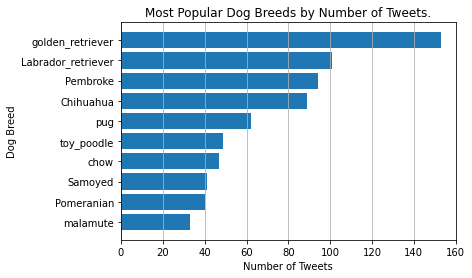

In [282]:
top_breeds = archive_analysis[archive_analysis.likely_breed!='none'].likely_breed.value_counts().head(10)
plt.barh(top_breeds.index, top_breeds )
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.xlim([0, 160])
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Breed')
plt.title('Most Popular Dog Breeds by Number of Tweets.');

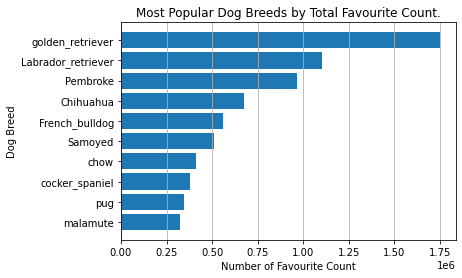

In [283]:
top_breeds_favorite = archive_analysis[archive_analysis.likely_breed!='none'].groupby(['likely_breed'])['favorite_count'].sum()
top_breeds_favorite = top_breeds_favorite.sort_values(ascending=False).head(10)
plt.barh(top_breeds_favorite.index, top_breeds_favorite)
plt.gca().invert_yaxis()
plt.grid(axis='x')

plt.xlabel('Number of Favourite Count')
plt.ylabel('Dog Breed')
plt.title('Most Popular Dog Breeds by Total Favourite Count.');

Insight:

When grouping tweets by dog breeds based on the neural network image predictions, the results shown in the horizontal bar plots below were obtained. Interestingly, the top 4 dog breeds by total number of breeds coincide in exactly the same order of popularity with those by total number of favourite tags. Retrievers are evidently the most popular dog breed (Golden Retriever first and Labrador Retriever second), followed by Pembroke in third place. A total of 8 out of the top 10 dog breeds in both scenarios coincide.

2. Investigating distribution of dog ratings

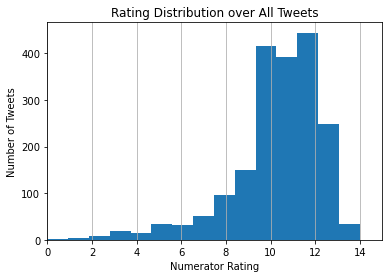

In [284]:
plt.hist(archive_analysis.rating_numerator, bins=15)
plt.grid(axis='x')
plt.xlabel('Numerator Rating')
plt.ylabel('Number of Tweets')
plt.xlim([0, 15])
plt.title('Rating Distribution over All Tweets');

Insight:

Data for numerator ratings is heavily skewed towards the left, with 75% of ratings exceeding a value of 10, and mean rating located at 10.5 (above the denominator standard value of 10).

3. Investigating magnitudes of retweets and favourite tags.

In [285]:
archive_analysis[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1942.000000,1942.000000
mean,2444.184346,8267.769310
std,4379.243473,12175.271705
min,11.000000,70.000000
25%,543.250000,1751.250000
50%,1181.500000,3729.000000
75%,2802.000000,10344.250000
max,77073.000000,155101.000000


Insight:

Overall, both the mean and median values for favourite count are higher than that for retweet count. This indicates that, on average, people are more likely to favourite a WeRateDogs tweet than to retweet it.

| Parameter | Mean | Median |
| --- | --- | --- |
| Retweet Count | 2444 | 1182 |
| Favourite Count | 8267 | 3729 |

4. Investigating relationship between retweet count and favourite count.

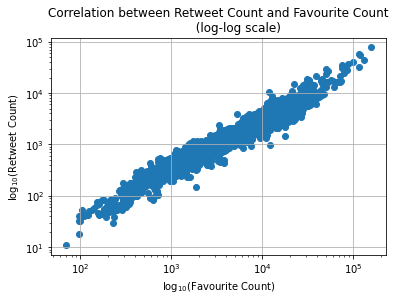

In [286]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(archive_analysis.favorite_count,
           archive_analysis.retweet_count)
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid()
plt.xlabel('log$_{10}$(Favourite Count)')
plt.ylabel('log$_{10}$(Retweet Count)')
plt.title("""Correlation between Retweet Count and Favourite Count
          (log-log scale)""");

In [287]:
# Find correlation between retweet count and favorite count
archive_analysis.corr(method='pearson')['retweet_count']['favorite_count']

0.9286827184911416

Insight:

Further from the insight that favourite tags are more likely than retweets, a strong positive correlation was identified between the retweet counts and favourite counts. As shown in the figure, the higher the favourite count, the higher the retweet count, with a Pearson's correlation factor of r=0.929.